In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

# Get the data from the dataset
data = pd.read_csv("./data/dataset1.csv")
data.reset_index(inplace=True)
data.columns = ['X1', 'X2', 'y']
data.head()
df = data.copy()
df.head()

# Get the features from the dataset
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]

print(X)

[[ 0.04  0.4 ]
 [-0.12 -0.62]
 [ 0.14 -0.42]
 ...
 [ 0.13 -0.45]
 [-0.11 -0.79]
 [ 0.69 -0.83]]


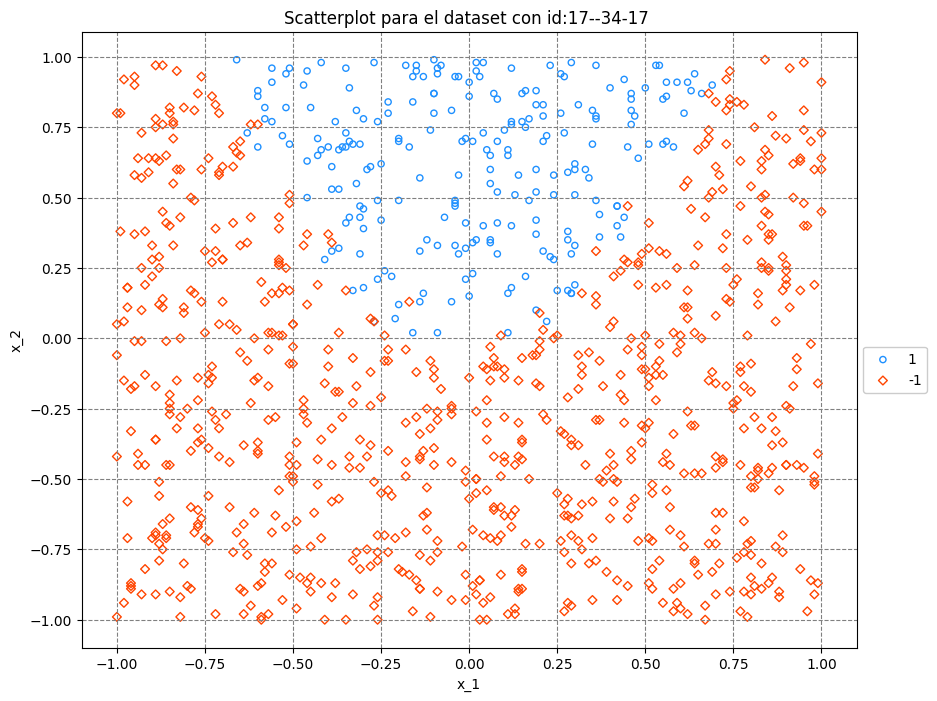

<Figure size 640x480 with 0 Axes>

In [3]:
# Data graph

plt.figure(figsize=(10, 8))
plt.style.use('default')
plt.grid(color='gray', linestyle='--')
plt.scatter(X1[y==1], X2[y==1], c='none', edgecolor='dodgerblue', alpha=1, marker = 'o', label='1', s=20)
plt.scatter(X1[y==-1], X2[y==-1], c='none', edgecolor='orangered', alpha=1, marker = 'D', label='-1', s=20)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Scatterplot para el dataset con id:17--34-17 ')
plt.legend(bbox_to_anchor=(1.1,0.5), loc='upper right', fancybox=True, framealpha=1, fontsize=10)
plt.show()
plt.savefig('Gráfico de los datos.png')

## Logistic Regression

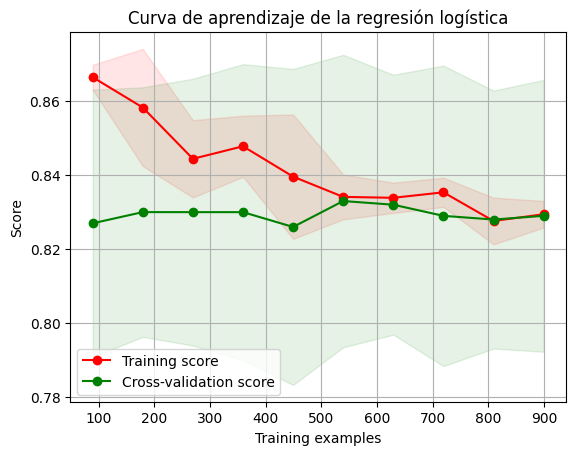

<Figure size 640x480 with 0 Axes>

In [4]:
lr_model=LogisticRegression()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Stadard deviation shadow
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="g", alpha=0.1)
plt.title("Curva de aprendizaje de la regresión logística")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()
plt.savefig('Curva de aprendizaje - regresion logistica.png')

In [5]:
# Having seen that with 800 training samples our model will perform with a 0.83 score, we will take 80% of the data for training

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
print('Train Set: ', x_train.shape, y_train.shape)
print('Test Set: ', x_test.shape, y_test.shape)

Train Set:  (799, 2) (799,)
Test Set:  (200, 2) (200,)


In [6]:
lr_model.fit(x_train, y_train)
coefficients = lr_model.coef_[0]
intercept = lr_model.intercept_[0]

print('The coefficients are: ',coefficients)
print('The intercept is: ',intercept)

The coefficients are:  [-0.08423714  3.59935851]
The intercept is:  -2.1098067109131797


Feature: 0, Score: -0.08424
Feature: 1, Score: 3.59936


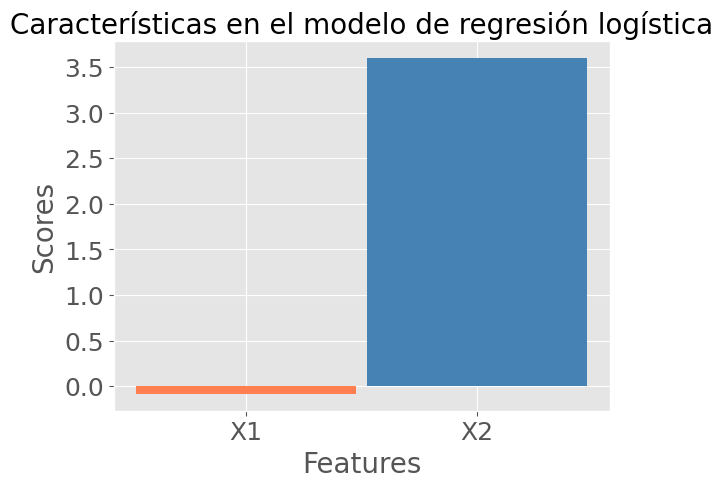

<Figure size 640x480 with 0 Axes>

In [7]:
for i,val in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,val))

with plt.style.context('ggplot'):
    plt.bar(['X1', 'X2'], coefficients, width=0.95, color=['coral', 'steelblue'])
    plt.title('Características en el modelo de regresión logística', fontsize=20)
    plt.xlabel('Features', fontsize=20)
    plt.ylabel('Scores', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()
    plt.savefig('Importancia de las características en el modelo de regresion logistica.png')

In [8]:
lr_predictions = lr_model.predict(x_test)
score = lr_model.score(x_test, y_test)
print('The score is: ', score)

print(classification_report(y_test, lr_predictions))

The score is:  0.83
              precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.83      0.83      0.83       200



[[131  16]
 [ 18  35]]


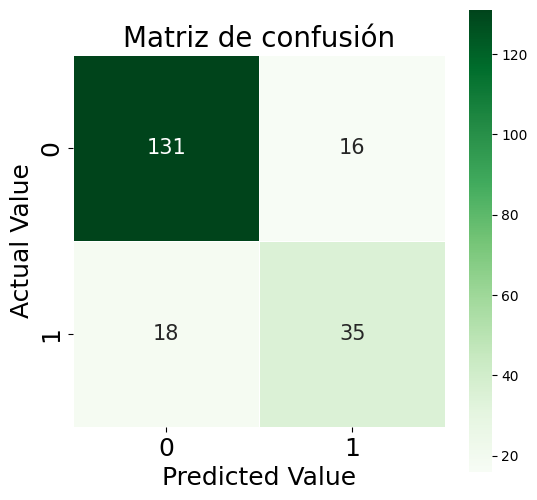

<Figure size 640x480 with 0 Axes>

In [9]:
cm = confusion_matrix(y_test, lr_predictions)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, annot_kws={"size": 15}, square = True, cmap = 'Greens');
plt.title('Matriz de confusión', fontsize=20)
plt.ylabel('Actual Value', fontsize=18);
plt.xlabel('Predicted Value', fontsize=18);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
plt.savefig('Matriz de confusión.png')

In [10]:
print(f"Model equation: log(p/(1-p)) = {intercept:.4f} + {coefficients[0]:.4f}*X1 + {coefficients[1]:.4f}*X2")
print(f"Decision boundary equation: X2 = {-intercept/coefficients[1]:.4f} - {coefficients[0]/coefficients[1]:.4f}*X1")

Model equation: log(p/(1-p)) = -2.1098 + -0.0842*X1 + 3.5994*X2
Decision boundary equation: X2 = 0.5862 - -0.0234*X1


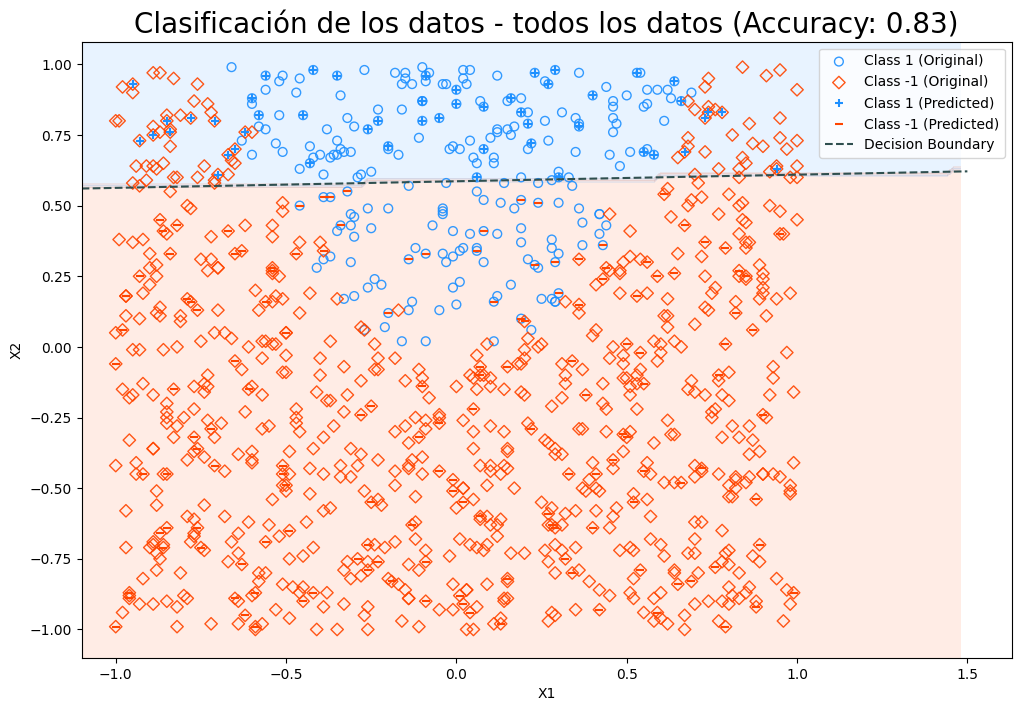

In [11]:
# Create a mesh to plot in
X1_min, X1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.5
X2_min, X2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, 0.02),
                       np.arange(X2_min, X2_max, 0.02))

# Calculate the decision boundary
Z = lr_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(12, 8))
plt.contourf(xx1, xx2, Z,colors=('orangered', 'dodgerblue') , alpha=0.1)

# Plot all original data (training + test)
X1, X2 = X[:, 0], X[:, 1]

plt.scatter(X1[y==1], X2[y==1], 
            c='none', edgecolor='dodgerblue', marker='o', s=40, label='Class 1 (Original)', alpha=0.9)

plt.scatter(X1[y==-1], X2[y==-1], 
            c='none', edgecolor='orangered', marker='D', s=40, label='Class -1 (Original)', alpha=0.9)

# Plot predictions for the test set
x_test_1 = x_test[:, 0]
x_test_2 = x_test[:, 1]

plt.scatter(x_test_1[lr_predictions == 1], x_test_2[lr_predictions == 1], 
            c='dodgerblue', marker='+', s=30, label='Class 1 (Predicted)')

plt.scatter(x_test_1[lr_predictions == -1], x_test_2[lr_predictions == -1], 
            c='orangered', marker='_', s=30, label='Class -1 (Predicted)')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Clasificación de los datos - todos los datos (Accuracy: {score:.2f})',fontsize=20)

# Plot the decision line
X1_line = np.array([X1_min, X1_max])
X2_line = -(intercept + coefficients[0] * X1_line) / coefficients[1]
plt.plot(X1_line, X2_line, linestyle='dashed', color='darkslategrey', label='Decision Boundary')

plt.legend()
plt.show()

## SVM

In [25]:
c_val = [0.001, 0.01, 1, 100]

for value in c_val:

    svm_model = LinearSVC(max_iter=11000, C=value)
    svm_model.fit(x_train, y_train)

    svm_predictions = svm_model.predict(x_test)
    svm_score = svm_model.score(x_test, y_test)

    report = classification_report(y_test, svm_predictions)
    print(f'Classification report with C={value}\n', report)

Classification report with C=0.001
               precision    recall  f1-score   support

          -1       0.73      1.00      0.85       147
           1       0.00      0.00      0.00        53

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.54      0.73      0.62       200

Classification report with C=0.01
               precision    recall  f1-score   support

          -1       0.86      0.90      0.88       147
           1       0.69      0.58      0.63        53

    accuracy                           0.82       200
   macro avg       0.77      0.74      0.76       200
weighted avg       0.81      0.82      0.82       200

Classification report with C=1
               precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78  

/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Classification report with C=0.001
               precision    recall  f1-score   support

          -1       0.73      1.00      0.85       147
           1       0.00      0.00      0.00        53

    accuracy                           0.73       200
   macro avg       0.37      0.50      0.42       200
weighted avg       0.54      0.73      0.62       200

Decision boundary equation: -0.01 * x1 + 0.30 * x2 + -0.33 = 0


/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/tux/classification_model_example/env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

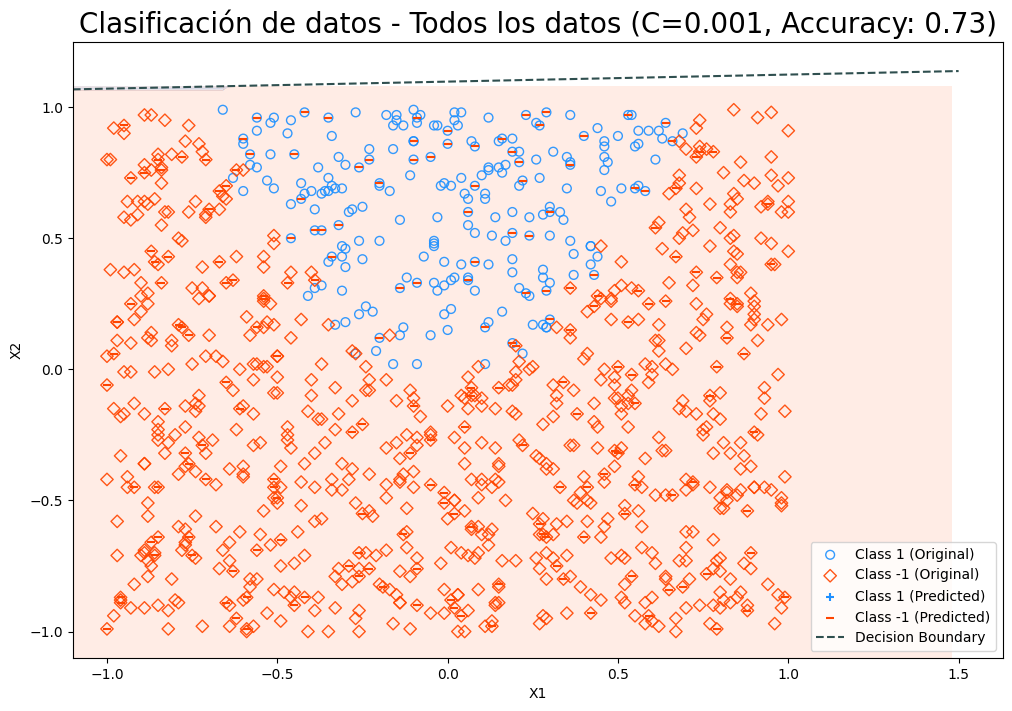

Classification report with C=0.01
               precision    recall  f1-score   support

          -1       0.86      0.90      0.88       147
           1       0.69      0.58      0.63        53

    accuracy                           0.82       200
   macro avg       0.77      0.74      0.76       200
weighted avg       0.81      0.82      0.82       200

Decision boundary equation: -0.02 * x1 + 0.79 * x2 + -0.53 = 0


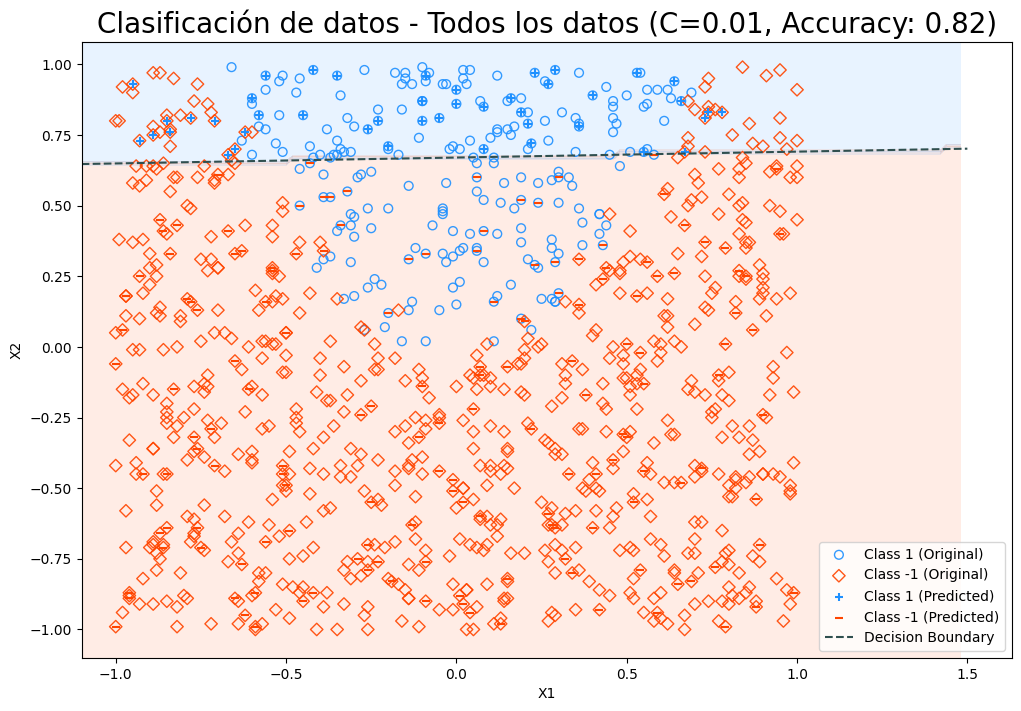

Classification report with C=1
               precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.83      0.83      0.83       200

Decision boundary equation: -0.03 * x1 + 1.31 * x2 + -0.73 = 0


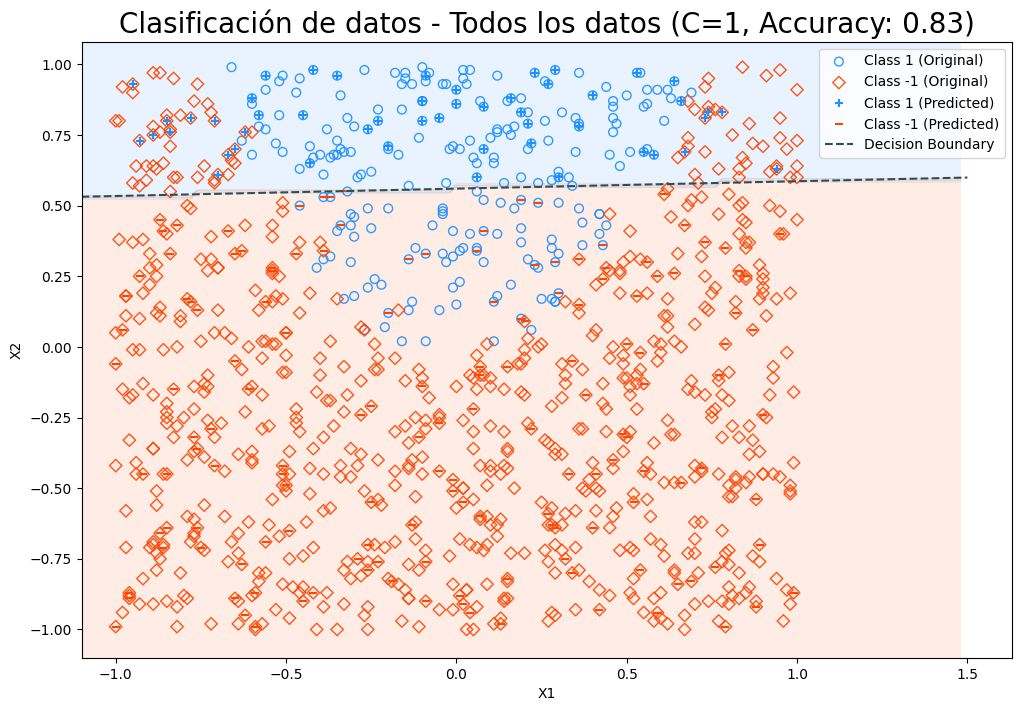

Classification report with C=100
               precision    recall  f1-score   support

          -1       0.88      0.89      0.89       147
           1       0.69      0.66      0.67        53

    accuracy                           0.83       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.83      0.83      0.83       200

Decision boundary equation: -0.03 * x1 + 1.32 * x2 + -0.74 = 0


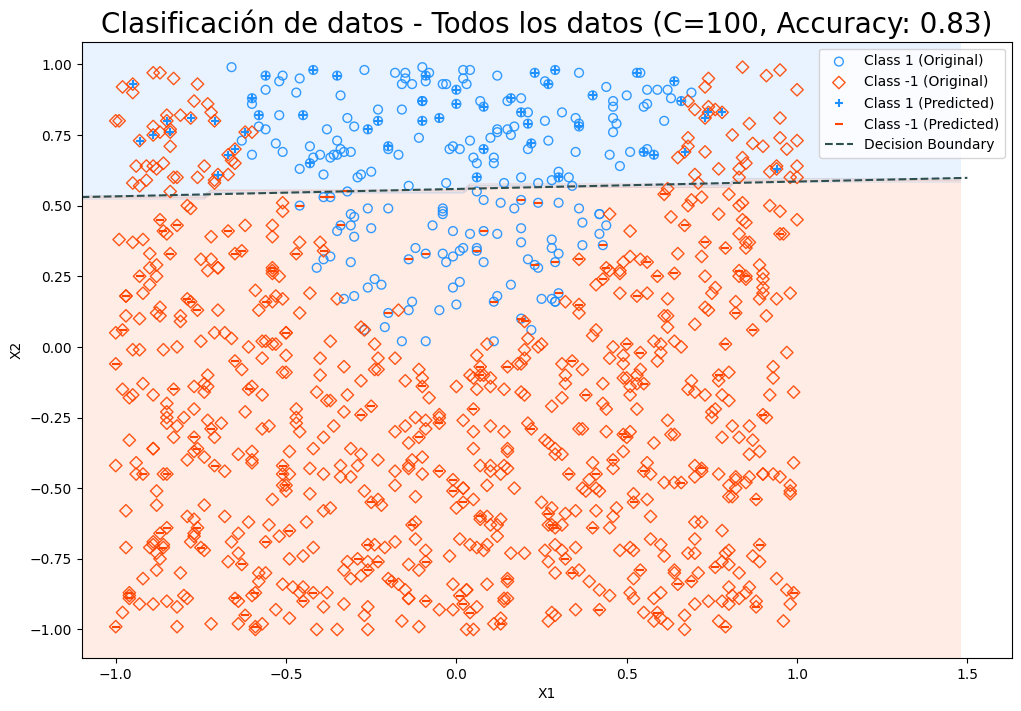

In [24]:
c_val = [0.001, 0.01, 1, 100]

for value in c_val:
    svm_model = LinearSVC(max_iter=1000, C=value)
    svm_model.fit(x_train, y_train)

    svm_predictions = svm_model.predict(x_test)
    svm_score = svm_model.score(x_test, y_test)

    report = classification_report(y_test, svm_predictions)
    print(f'Classification report with C={value}\n', report)

    # Get decision boundary equation
    coefficients_svm = svm_model.coef_[0]
    intercept_svm = svm_model.intercept_[0]
    print(f"Decision boundary equation: {coefficients_svm[0]:.2f} * x1 + {coefficients_svm[1]:.2f} * x2 + {intercept_svm:.2f} = 0")

    # Create a mesh to plot in
    X1_min, X1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.5
    X2_min, X2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, 0.02),
                           np.arange(X2_min, X2_max, 0.02))

    # Calculate the decision boundary
    Z = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(12, 8))
    plt.contourf(xx1, xx2, Z, colors=('orangered', 'dodgerblue'), alpha=0.1)

    # Plot all original data (training + test)
    X1, X2 = X[:, 0], X[:, 1]

    plt.scatter(X1[y==1], X2[y==1], 
                c='none', edgecolor='dodgerblue', marker='o', s=40, label='Class 1 (Original)', alpha=0.9)

    plt.scatter(X1[y==-1], X2[y==-1], 
                c='none', edgecolor='orangered', marker='D', s=40, label='Class -1 (Original)', alpha=0.9)

    # Plot predictions for the test set
    x_test_1 = x_test[:, 0]
    x_test_2 = x_test[:, 1]

    plt.scatter(x_test_1[svm_predictions == 1], x_test_2[svm_predictions == 1], 
                c='dodgerblue', marker='+', s=30, label='Class 1 (Predicted)')

    plt.scatter(x_test_1[svm_predictions == -1], x_test_2[svm_predictions == -1], 
                c='orangered', marker='_', s=30, label='Class -1 (Predicted)')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'Clasificación de datos - Todos los datos (C={value}, Accuracy: {svm_score:.2f})', fontsize=20)

    # Plot the decision line
    X1_line = np.array([X1_min, X1_max])
    X2_line = -(intercept_svm + coefficients_svm[0] * X1_line) / coefficients_svm[1]
    plt.plot(X1_line, X2_line, linestyle='dashed', color='darkslategrey', label='Decision Boundary')

    plt.legend()
    plt.show()